# Notebook for learning logistic Regression 

Here is an overview of this Notebook:

1. Basic Mathematical Overview of the Logistic Function

2. DataSet Analysis

3. Data Visualization

4. Data Preparation

5. Multicollinearity Consideration

6. Logistic Regression with SciKit Learn

7. Testing and Training Data Sets

8. Conclusion and More Resources


In [1]:
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame

import math

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

import statsmodels.api as sm 

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
sns.set_style('whitegrid')

### Step 1 : Basic Math Overview 

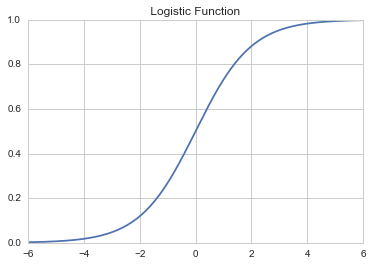

In [2]:

# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

### Step 2 : Data Set and Analysis 

The dataset is packaged within Statsmodels. It is a data set from a 1974 survey of women by Redbook magazine. Married women were asked if they have had extramarital affairs. The published work on the data set can be found in:

Fair, Ray. 1978. “A Theory of Extramarital Affairs,” Journal of Political Economy, February, 45-61.

It is important to note that this data comes from a self-reported survey, which can have many issues as far as the accuracy of the data. Also this analysis isn't trying to promote any agenda concerning women or marriage, the data is just interesting but its accuracy should be met with a healthy dose of skepticism.

We'll ignore those issues concerning the data and just worry about the logistic regression aspects to the data.

DataSet Description:

From the Statsmodels website we have the following information about the data:


Number of observations: 6366 Number of variables: 9 Variable name definitions:

rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,4 = good, 5 = very good

age             : Age

yrs_married     : No. years married. Interval approximations. See original paper for detailed explanation.

children        : No. children

religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,4 = strongly

educ            : Level of education, 9 = grade school, 12 = high
                school, 14 = some college, 16 = college graduate,
                17 = some graduate school, 20 = advanced degree
                
occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                or unskilled worker; 3 = white-colloar; 4 = teacher
                counselor social worker, nurse; artist, writers;
                technician, skilled worker, 5 = managerial,
                administrative, business, 6 = professional with
                advanced degree
                
occupation_husb : Husband's occupation. Same as occupation.

affairs         : measure of time spent in extramarital affairs





http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html

In [4]:
marriage_df=sm.datasets.fair.load_pandas().data

In [5]:
marriage_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32,9.0,3,3,17,2,5,0.111111
1,3,27,13.0,3,1,14,3,4,3.230769
2,4,22,2.5,0,1,16,3,5,1.400000
3,4,37,16.5,4,3,16,5,5,0.727273
4,5,27,9.0,1,1,14,3,4,4.666666


In [6]:
def affairCheck(x):
    if x!=0:
        return 1
    else:
        return 0 

In [7]:
marriage_df['ifAffair']=marriage_df['affairs'].apply(affairCheck)

In [8]:
marriage_df.head(n=20)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,ifAffair
0,3,32,9.0,3.0,3,17,2,5,0.111111,1
1,3,27,13.0,3.0,1,14,3,4,3.230769,1
2,4,22,2.5,0.0,1,16,3,5,1.400000,1
3,4,37,16.5,4.0,3,16,5,5,0.727273,1
4,5,27,9.0,1.0,1,14,3,4,4.666666,1
5,4,27,9.0,0.0,2,14,3,4,4.666666,1
6,5,37,23.0,5.5,2,12,5,4,0.852174,1
7,5,37,23.0,5.5,2,12,2,3,1.826086,1
8,3,22,2.5,0.0,2,12,3,3,4.799999,1
9,3,27,6.0,0.0,1,16,3,5,1.333333,1


In [11]:
marriage_df['ifAffair'].describe()

count    6366.000000
mean        0.322495
std         0.467468
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ifAffair, dtype: float64

In [12]:
marriage_df.groupby('ifAffair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
ifAffair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


### Step 3: Visualizations

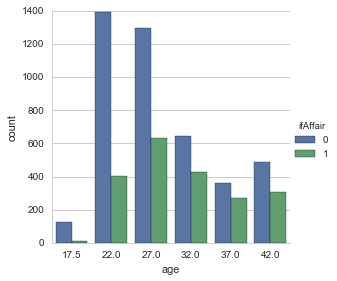

In [13]:
sns.factorplot('age',data=marriage_df, hue='ifAffair', kind='count')

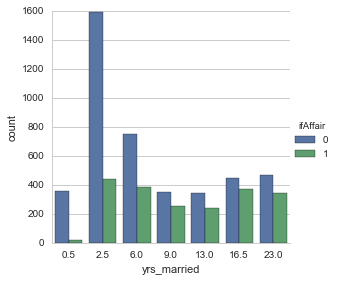

In [14]:
sns.factorplot('yrs_married',data=marriage_df, hue='ifAffair', kind='count')

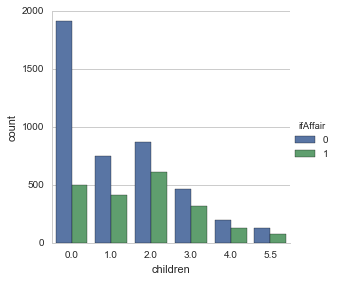

In [15]:
sns.factorplot('children',data=marriage_df, hue='ifAffair', kind='count')

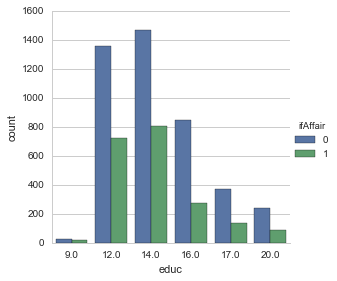

In [16]:
sns.factorplot('educ',data=marriage_df, hue='ifAffair', kind='count')

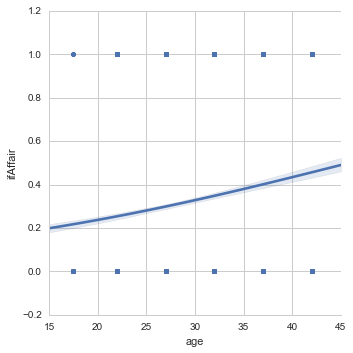

In [28]:
sns.lmplot(x='age',y='ifAffair',data=marriage_df,logistic= True)

### Step 4 : Data Prep

If we look at the data, we'll notice that two columns are unlike the others. Occupation and Husband's Occupation. These columns are in a format know as Categorical Variables. Basically they are in set quantity/category, so that 1.0 and 2.0 are seperate variables, not values along a spectrum that goes from 1-2 (e.g. There is no 1.5 for the occupation column). Pandas has a built-in method of getting dummy variables and creating new columns from them.

In [29]:
occ_dummies=pd.get_dummies(marriage_df['occupation'])

occ_husb_dummies=pd.get_dummies(marriage_df['occupation_husb'])

In [31]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [32]:
occ_husb_dummies.tail()

,1.0,2.0,3.0,4.0,5.0,6.0
6361,0,0,1,0,0,0
6362,0,0,0,0,1,0
6363,1,0,0,0,0,0
6364,0,0,0,1,0,0
6365,0,0,0,1,0,0


In [33]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']

In [36]:
occ_husb_dummies.columns=['occ_hub1','occ_hub2','occ_hub3','occ_hub4','occ_hub5','occ_hub6']

In [39]:
X=marriage_df.drop(['occupation','occupation_husb','ifAffair'],axis=1)

In [40]:
dummies=pd.concat([occ_dummies,occ_husb_dummies],axis=1)

In [41]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3,32,9.0,3,3,17,0.111111
1,3,27,13.0,3,1,14,3.230769
2,4,22,2.5,0,1,16,1.400000
3,4,37,16.5,4,3,16,0.727273
4,5,27,9.0,1,1,14,4.666666


In [42]:
dummies.tail()

,occ1,occ2,occ3,occ4,occ5,occ6,occ_hub1,occ_hub2,occ_hub3,occ_hub4,occ_hub5,occ_hub6
6361,0,0,0,1,0,0,0,0,1,0,0,0
6362,0,0,0,0,1,0,0,0,0,0,1,0
6363,0,0,1,0,0,0,1,0,0,0,0,0
6364,0,0,1,0,0,0,0,0,0,1,0,0
6365,0,1,0,0,0,0,0,0,0,1,0,0


In [43]:
X=pd.concat([X,dummies],axis=1)

In [44]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,occ_hub1,occ_hub2,occ_hub3,occ_hub4,occ_hub5,occ_hub6
0,3,32,9.0,3,3,17,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5,27,9.0,1,1,14,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [45]:
Y= marriage_df.ifAffair

In [46]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: ifAffair, dtype: int64

### Step 5: MultiCollinearity 

In [51]:
X.occ1.describe()

count    6366.00000
mean        0.00644
std         0.08000
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: occ1, dtype: float64

Now we need to get rid of a few columns. We will be dropping the occ1 and hocc1 columns to avoid multicollinearity. Multicollinearity occurs due to the dummy variables) we created. This is because the dummy variables are highly correlated, our model begins to get distorted because one of the dummy variables can be linearly predicted from the others. We take care of this problem by dropping one of the dummy variables from each set, we do this at the cost of losing a data set point.


The other column we will drop is the affairs column. This is because it is basically a repeat of what will be our Y target, instead of 0 and 1 it just has 0 or a number, so we'll need to drop it for our target to make sense.

http://en.wikipedia.org/wiki/Multicollinearity#Remedies_for_multicollinearity

In [69]:
X=X.drop(['occ1','occ_hub1'],axis=1)

In [68]:
X=X.drop(['affairs'],axis=1)

In [70]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,occ_hub2,occ_hub3,occ_hub4,occ_hub5,occ_hub6
0,3,32,9.0,3,3,17,1,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,0,1,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,0,1,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0,0,0,1,0,0,0,0,1,0
4,5,27,9.0,1,1,14,0,1,0,0,0,0,0,1,0,0


In [71]:
Y=np.ravel(Y)

In [72]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [73]:
log_model = LogisticRegression()

In [74]:
log_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
log_model.score(X,Y)

0.72588752748978946

In [76]:
Y.mean()

0.32249450204209867

In [77]:
coeff_df=DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

In [78]:
coeff_df

,0,1
0,rate_marriage,[-0.697845453825]
1,age,[-0.0563368031972]
2,yrs_married,[0.103893444136]
3,children,[0.0181853982481]
4,religious,[-0.368506616998]
5,educ,[0.00864804494766]
6,occ2,[0.298118794658]
7,occ3,[0.608150180777]
8,occ4,[0.346511273036]
9,occ5,[0.942259498161]


In [79]:
X=X.drop(['age'],axis=1)

In [82]:
log_model2 = LogisticRegression()

In [83]:
log_model2.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
log_model2.score(X,Y)

0.72258875274897894

In [85]:
coeff_df2=DataFrame(zip(X.columns,np.transpose(log_model2.coef_)))

In [86]:
coeff_df2

,0,1
0,rate_marriage,[-0.694933661658]
1,yrs_married,[0.0548208399215]
2,children,[0.025130119692]
3,religious,[-0.375122915097]
4,educ,[-0.0137113942625]
5,occ2,[0.196896283484]
6,occ3,[0.502299154127]
7,occ4,[0.23832390783]
8,occ5,[0.824463652769]
9,occ6,[0.795692070075]


### Testing and Training models


In [88]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [89]:
log_model3=LogisticRegression()

In [90]:
log_model3.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
affPredict=log_model3.predict(X_test)

In [92]:
print metrics.accuracy_score(Y_test,affPredict)

0.714195979899


## The END